In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

## #1

In [2]:
gdp_le = pd.read_csv("../data/gdp_le.csv")

In [3]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [4]:
life_exp_year = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [5]:
life_exp_year.params

Intercept   -468.138140
Year           0.267722
dtype: float64

### The year coefficient means that to get from the year to life expectancy, you would multiply the value first by that coefficient. The intercept means that whatever value you get after that, you should add it to it. 

### Specifically for these numbers, it shows with the intercept that the life_exp values are much lower than the year values, and that as the year increases the life exp. increases, but not by too much. 

## #1b)

In [6]:
gdp_le["Year_From_1990"] = gdp_le["Year"] - 1990

In [7]:
life_exp_year_diff = smf.ols("Life_Expectancy ~ Year_From_1990", data=gdp_le).fit()

In [23]:
life_exp_year_diff.params
life_exp_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        11:43:51   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -468.1381     26.087    -17.945      0.000    -519.279    -416.998
Year           0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                     4.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The Year coefficient is the same, (which makes sense due to the fact that we just scaled the year number), and the intercept is showing that when you make the change in years of life exp. to the year diff, you would add 64.

### The P-Value is 0 (or very very close to 0) so it is significant.

## #1c)

In [9]:
pred_df = pd.DataFrame(
    {
        'Year_From_1990': np.linspace(start=gdp_le['Year_From_1990'].min(), stop=gdp_le['Year_From_1990'].max())
    }
)

pred_df['mean_estimate'] = life_exp_year_diff.predict(pred_df)


In [10]:
pred_df

,Year_From_1990,mean_estimate
0,0.000000,64.628889
1,0.653061,64.803728
2,1.306122,64.978567
3,1.959184,65.153406
4,2.612245,65.328245
5,3.265306,65.503084
6,3.918367,65.677923
7,4.571429,65.852762
8,5.224490,66.027601
9,5.877551,66.202440


In [11]:
gdp_le_year_le_mean = gdp_le.groupby("Year_From_1990")["Life_Expectancy"].mean().reset_index()
gdp_le_year_le_mean

,Year_From_1990,Life_Expectancy
0,0,64.745253
1,1,65.021276
2,2,65.217845
3,3,65.218031
4,4,65.339539
5,5,65.956224
6,6,66.200189
7,7,66.437280
8,8,66.556082
9,9,66.916176


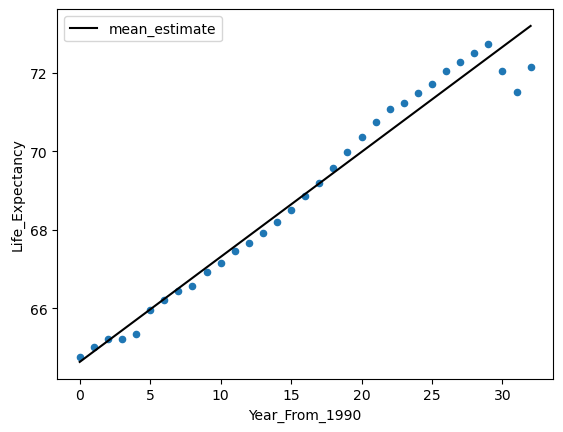

In [12]:
fig, ax = plt.subplots()
gdp_le_year_le_mean.plot(kind="scatter", x="Year_From_1990", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year_From_1990", y="mean_estimate", color="black", ax=ax);

### It actually seems to do pretty well all things considered, the ending is kind of off but other than that it is pretty close. 

## #1d)

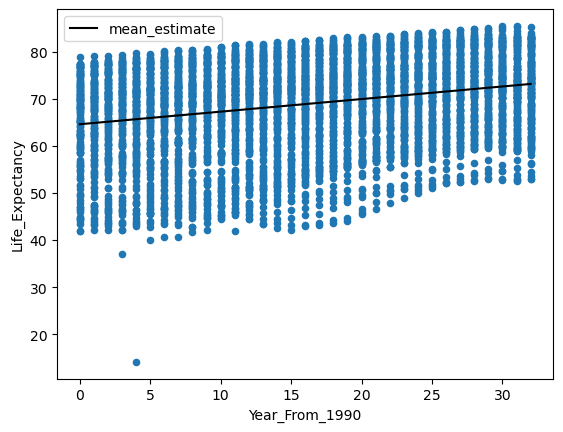

In [13]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year_From_1990", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year_From_1990", y="mean_estimate", color="black", ax=ax);

## #1e)

In [14]:
life_exp_year_diff.rsquared

0.07154748843194647

### It means that our prediction is in all reality not very accurate in trying to predict what life expectancy would be based on the year. By looking at the most recent graph, we can see it is obvious in that there is a very large and similar range for almost all year values.

# #2

In [15]:
gdp_le_2021 = gdp_le[gdp_le["Year"] == 2021]

In [16]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Year_From_1990
0,Afghanistan,2021,1517.016266,Asia,61.982,31
21,Albania,2021,14595.944386,Europe,76.463,31
54,Algeria,2021,11029.138782,Africa,76.377,31
87,Angola,2021,5911.835657,Africa,61.643,31
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,31
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,31
5377,Vanuatu,2021,2800.493866,Oceania,70.449,31
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,31
5439,Zambia,2021,3236.788981,Africa,61.223,31


In [17]:
life_exp_GDP = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

### #2a)

In [19]:
life_exp_GDP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        11:12:33   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.9499      0.549    120.225      0.000      64.867      67.033
GDP_Per_Capita     0.0003   1.76e-05     14.608      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                     4.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The coefficients show that for about every GDP_Per_Capita, the life expectancy will be a factor of .0003 of that. The intercept is telling us that from the first calculation, you will add 65.9499 years to the life_exp you get.

## #2b)

In [20]:
gdp_le_2021['GDP_1000'] = gdp_le_2021['GDP_Per_Capita'] / 1000

C:\Users\teska\AppData\Local\Temp\ipykernel_27488\691470619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['GDP_1000'] = gdp_le_2021['GDP_Per_Capita'] / 1000


In [21]:
life_exp_GDP = smf.ols("Life_Expectancy ~ GDP_1000", data=gdp_le_2021).fit()

In [22]:
life_exp_GDP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        11:15:37   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.9499      0.549    120.225      0.000      64.867      67.033
GDP_1000       0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### It only changes the factor that is multiplied by, the intercept is the same. It shows that when scaling one of the variables, it seems to scale the GDP_1000 coef as well.

## #2c)

### The coefficients are significant, with the p-value being very very close to 0 (or basically 0)

## #2d)

In [24]:
pred_df_2021 = pd.DataFrame(
    {
        'GDP_1000': np.linspace(start=gdp_le_2021['GDP_1000'].min(), stop=gdp_le_2021['GDP_1000'].max())
    }
)

pred_df_2021['mean_estimate'] = life_exp_GDP.predict(pred_df_2021)

In [25]:
pred_df_2021

,GDP_1000,mean_estimate
0,0.714067,66.133308
1,3.060382,66.736057
2,5.406696,67.338806
3,7.753011,67.941554
4,10.099326,68.544303
5,12.445641,69.147052
6,14.791956,69.749801
7,17.138271,70.352550
8,19.484585,70.955299
9,21.830900,71.558048


In [30]:
life_exp_GDP.predict(pd.DataFrame(
    {
        'GDP_1000': [50, 100]
    }
))

0    78.794457
1    91.639045
dtype: float64

### The model would predict that a country with GDP per capita of 50,000 would have an average life expectancy of 78.79 years.
### The model would predict that a country with GDP per capita of 1000,000 would have an average life expectancy of 91.63 years.

## #2e)

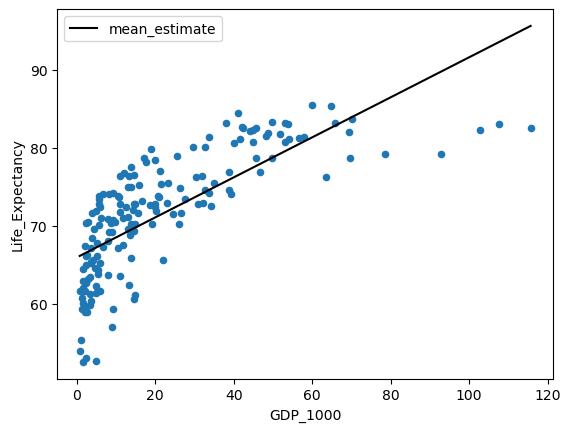

In [32]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_1000", y="Life_Expectancy", ax=ax)
pred_df_2021.plot(kind="line", x="GDP_1000", y="mean_estimate", color="black", ax=ax);

### I would say it does not seem to fit the data very well. The dots are giving a logarithmic shape instead of something linear.

# #3)

In [34]:
gdp_le_2021


,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Year_From_1990,GDP_1000
0,Afghanistan,2021,1517.016266,Asia,61.982,31,1.517016
21,Albania,2021,14595.944386,Europe,76.463,31,14.595944
54,Algeria,2021,11029.138782,Africa,76.377,31,11.029139
87,Angola,2021,5911.835657,Africa,61.643,31,5.911836
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,31,19.899882
...,...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,31,7.800502
5377,Vanuatu,2021,2800.493866,Oceania,70.449,31,2.800494
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,31,5.641044
5439,Zambia,2021,3236.788981,Africa,61.223,31,3.236789


In [37]:
gdp_le_2021["GDP_log"] = np.log(gdp_le_2021["GDP_1000"])

C:\Users\teska\AppData\Local\Temp\ipykernel_27488\334968943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021["GDP_log"] = np.log(gdp_le_2021["GDP_1000"])


## #3a)

In [39]:
life_exp_GDP_log = smf.ols("Life_Expectancy ~ np.log(GDP_Per_Capita)", data=gdp_le_2021).fit()
life_exp_GDP_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        12:28:36   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.5545      0.742     77.612      0.000      56.091      59.018
GDP_log        5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         7.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Due to the P-Values for both coefficients being very close to 0 (or 0), we can say that they are significant. 

## #3b)

### The coefficients tell us that the life expectancy will on average be 5.5890 times larger than the log GDP_Per_Capita with an offset of 57.5545 years.

In [40]:
life_exp_GDP_log.predict(pd.DataFrame(
    {
        'GDP_log': [np.log(50), np.log(100)]
    }
))

0    79.418861
1    83.292870
dtype: float64

### The model estimates for a GDP_per_capita of 50,000 that the average life. exp is about 79.418 years, and for 100,000 it estimates an avg. life exp of about 83.29 years.

## #3c)

In [53]:
pred_df_2021_log = pd.DataFrame(
    {
        'GDP_log': np.linspace(start=gdp_le_2021['GDP_log'].min(), stop=gdp_le_2021['GDP_log'].max())
    }
)

pred_df_2021_log['mean_estimate'] = life_exp_GDP_log.predict(pred_df_2021_log)

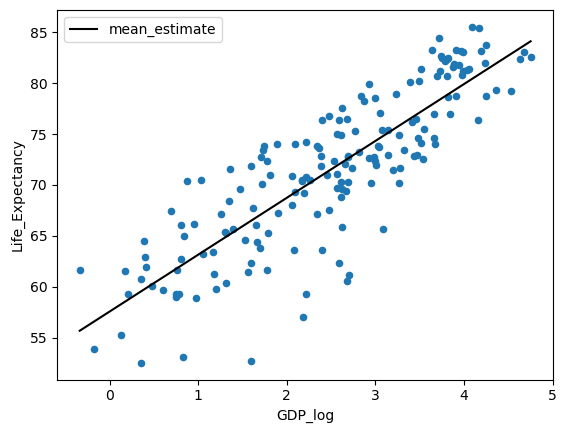

In [42]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_log", y="Life_Expectancy", ax=ax)
pred_df_2021_log.plot(kind="line", x="GDP_log", y="mean_estimate", color="black", ax=ax);

### This fits much much better than the previous estimate.

# #4

In [44]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Year_From_1990
0,Afghanistan,2021,1517.016266,Asia,61.982,31
1,Afghanistan,2020,1968.341002,Asia,62.575,30
2,Afghanistan,2019,2079.921861,Asia,63.565,29
3,Afghanistan,2018,2060.698973,Asia,63.081,28
4,Afghanistan,2017,2096.093111,Asia,63.016,27
...,...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588,4
5500,Zimbabwe,1993,2458.783255,Africa,54.426,3
5501,Zimbabwe,1992,2468.278257,Africa,56.435,2
5502,Zimbabwe,1991,2781.787843,Africa,58.091,1


In [45]:
gdp_le['GDP_log'] = np.log(gdp_le['GDP_Per_Capita'])

In [46]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,Year_From_1990,GDP_log
0,Afghanistan,2021,1517.016266,Asia,61.982,31,7.324501
1,Afghanistan,2020,1968.341002,Asia,62.575,30,7.584946
2,Afghanistan,2019,2079.921861,Asia,63.565,29,7.640086
3,Afghanistan,2018,2060.698973,Asia,63.081,28,7.630801
4,Afghanistan,2017,2096.093111,Asia,63.016,27,7.647830
...,...,...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588,4,7.889874
5500,Zimbabwe,1993,2458.783255,Africa,54.426,3,7.807422
5501,Zimbabwe,1992,2468.278257,Africa,56.435,2,7.811276
5502,Zimbabwe,1991,2781.787843,Africa,58.091,1,7.930849


In [48]:
life_exp_GDP_log_all = smf.ols("Life_Expectancy ~ GDP_log", data=gdp_le).fit()
life_exp_GDP_log_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:52:43   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1941      0.532     17.297      0.000       8.152      10.236
GDP_log        6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred_df_log = pd.DataFrame(
    {
        'GDP_log': np.linspace(start=gdp_le['GDP_log'].min(), stop=gdp_le['GDP_log'].max())
    }
)

pred_df_log['mean_estimate'] = life_exp_GDP_log_all.predict(pred_df_log)

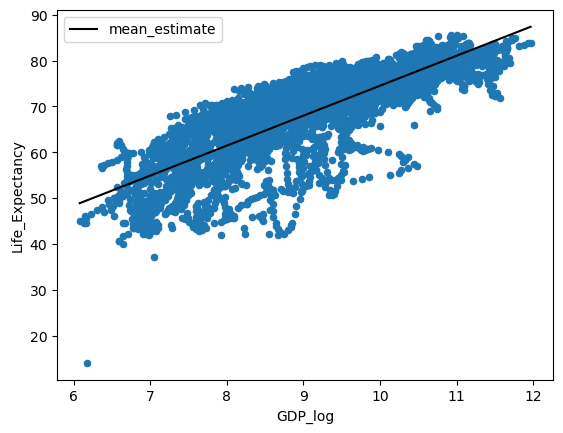

In [50]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="GDP_log", y="Life_Expectancy", ax=ax)
pred_df_log.plot(kind="line", x="GDP_log", y="mean_estimate", color="black", ax=ax);

In [51]:
life_exp_GDP_log_all = smf.ols("Life_Expectancy ~ GDP_log + Year", data=gdp_le).fit()
life_exp_GDP_log_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:55:45   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.0674     14.490    -17.879      0.000    -287.474    -230.661
GDP_log        6.3599      0.057    112.387      0.000       6.249       6.471
Year           0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                     4.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
pred_df_log = pd.DataFrame(
    {
        'GDP_log': np.linspace(start=gdp_le['GDP_log'].min(), stop=gdp_le['GDP_log'].max()),
        'Year': np.linspace(start=gdp_le['Year'].min(), stop=gdp_le['Year'].max())
    }
)

pred_df_log['mean_estimate'] = life_exp_GDP_log_all.predict(pred_df_log)

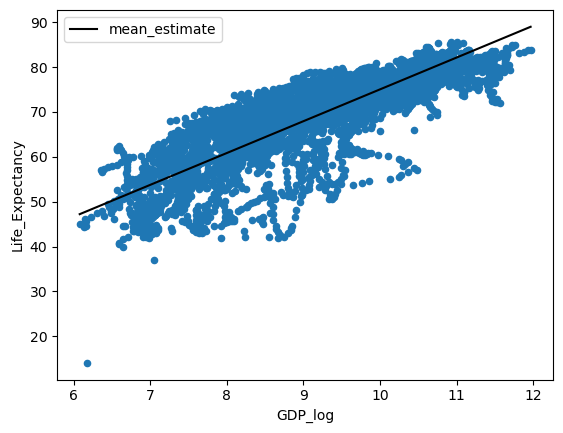

In [56]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="GDP_log", y="Life_Expectancy", ax=ax)
pred_df_log.plot(kind="line", x="GDP_log", y="mean_estimate", color="black", ax=ax);

### I think that the coefficient for year is saying that the prediction from the GDP_log and Life_Expectancy is to change by .1345 in life_exp as the years get larger.

### It might have a limitation of it not being very helpful due to the fact that there was already such a strong correlation between the GDP_log and life expectancy?
### It also wouldn't be too helpful because different years could have different "financial world situations" where the line coefficient could be much different.